In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt


2022-09-28 02:54:52.583863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 02:54:52.794923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-28 02:54:52.794961: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-28 02:54:52.890062: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-28 02:54:54.168302: W tensorflow/stream_executor/platform/de

In [2]:
dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
sample_index = 7
train_sample = train_images[sample_index]


In [9]:
train_sample.shape

(32, 32, 3)

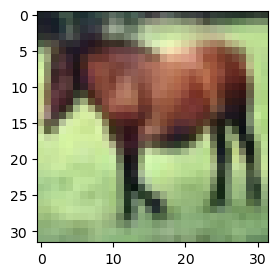

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(train_sample)
plt.tick_params(labelbottom='off')
plt.tick_params(labelleft='off')


In [7]:
def plot_augmentation_image(train_sample, params):

    # 同じ画像を16個複製する
    train_samples = np.repeat(train_sample.reshape((1, *train_sample.shape)), 16, axis=0)

    # 16個に対してparamsで与えられた変換を実施
    data_generator = keras.preprocessing.image.ImageDataGenerator(**params)
    generator = data_generator.flow(train_samples, batch_size=16)

    # 変換後のデータを取得
    batch_x = generator.next()

    # 変換後はfloat32となっているため、uint8に変換
    batch_x = batch_x.astype(np.uint8)

    # 描画処理
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(batch_x[i])
        plt.tick_params(labelbottom='off')
        plt.tick_params(labelleft='off')


### モデル学習への組み込み

In [17]:
params = {
    'zoom_range': [0.5, 2.0],
    'rotation_range': 45,
    'vertical_flip': True,
    'horizontal_flip': True,
    'height_shift_range': 0.1,
    'width_shift_range': 0.1,
    'shear_range': 90,
    'channel_shift_range': 127
}
generator = keras.preprocessing.image.ImageDataGenerator(**params)

train_iter = generator.flow(x=train_images, y=train_labels)


In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation='softmax'),
])


2022-09-28 03:12:28.366743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-28 03:12:28.366821: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-28 03:12:28.366863: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (55c2e234c126): /proc/driver/nvidia/version does not exist
2022-09-28 03:12:28.367241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.compile(
    optimizer='Adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model.fit(train_images, train_labels, epochs=10) # こちらがよく見る形
model.fit(train_iter, epochs=10) # 代わりにtrain_iterを引数に与える。


Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3528 - accuracy: 0.1220
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.0739 - accuracy: 0.1205
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.0332 - accuracy: 0.0975
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.0096 - accuracy: 0.0894
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.9895 - accuracy: 0.0824
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.9771 - accuracy: 0.0886
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.9597 - accuracy: 0.0903
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.9412 - accuracy: 0.0812
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9393 - accuracy: 0.0860
Epoch 10/10
1563/1563 [==============================] - 56s 36m

### パラメータの挙動確認

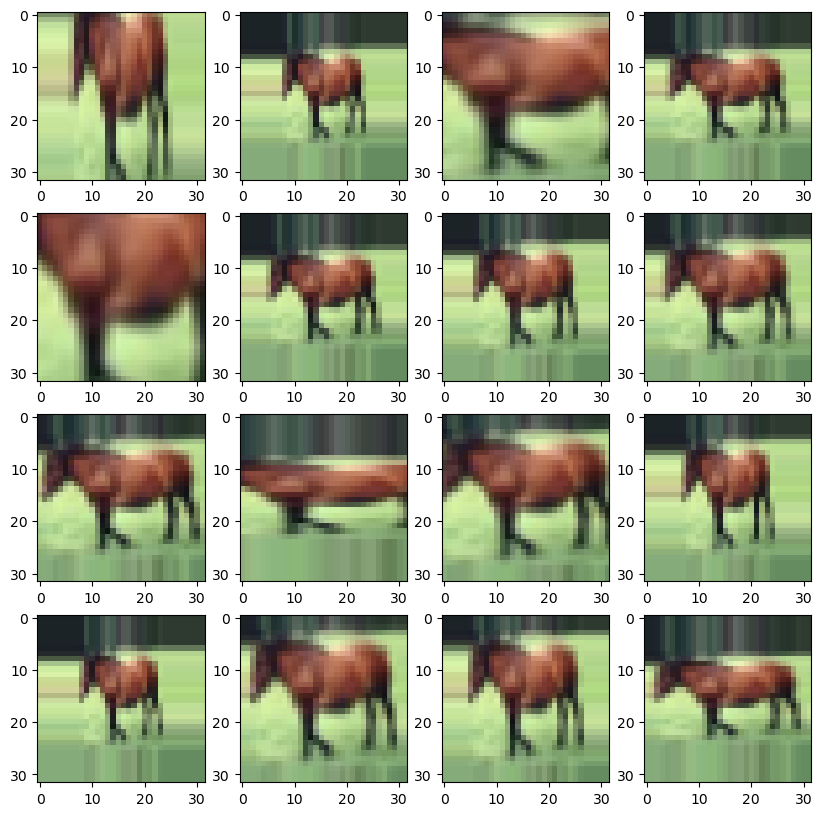

In [8]:
params = {
    'zoom_range': [0.5, 2.0]
}
plot_augmentation_image(train_sample, params)


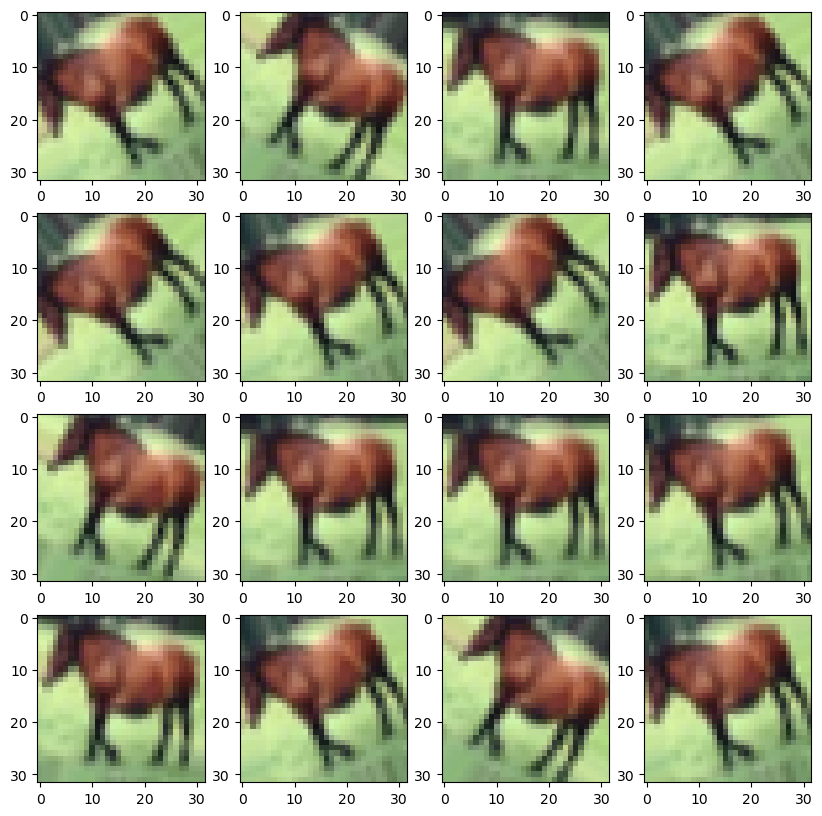

In [10]:
params = {
    'rotation_range': 45
}
plot_augmentation_image(train_sample, params)


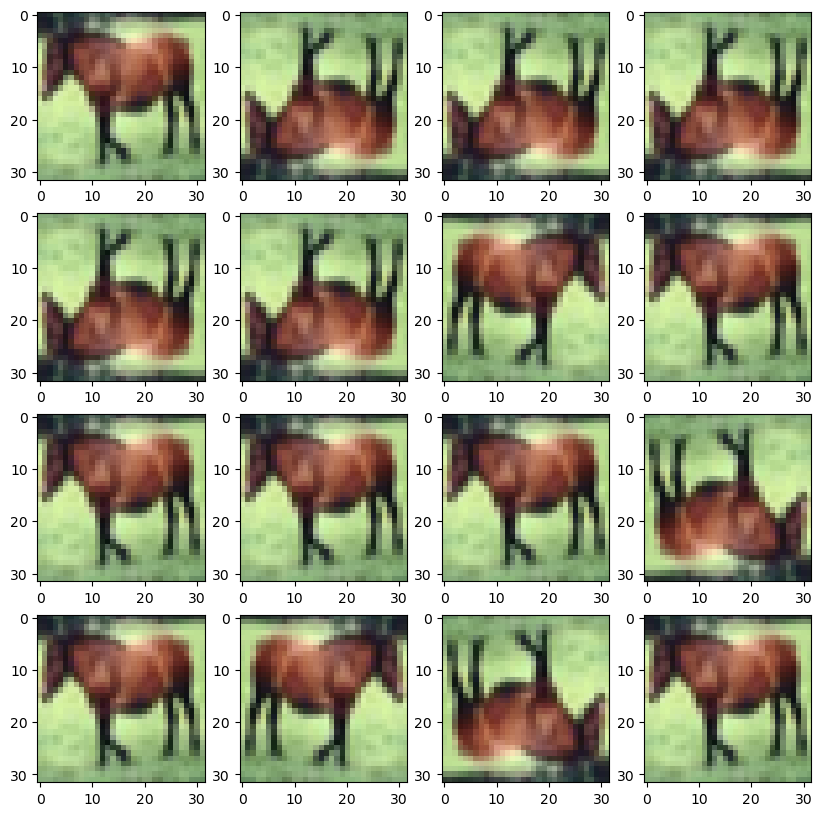

In [11]:
params = {
    'vertical_flip': True,
    'horizontal_flip': True
}
plot_augmentation_image(train_sample, params)


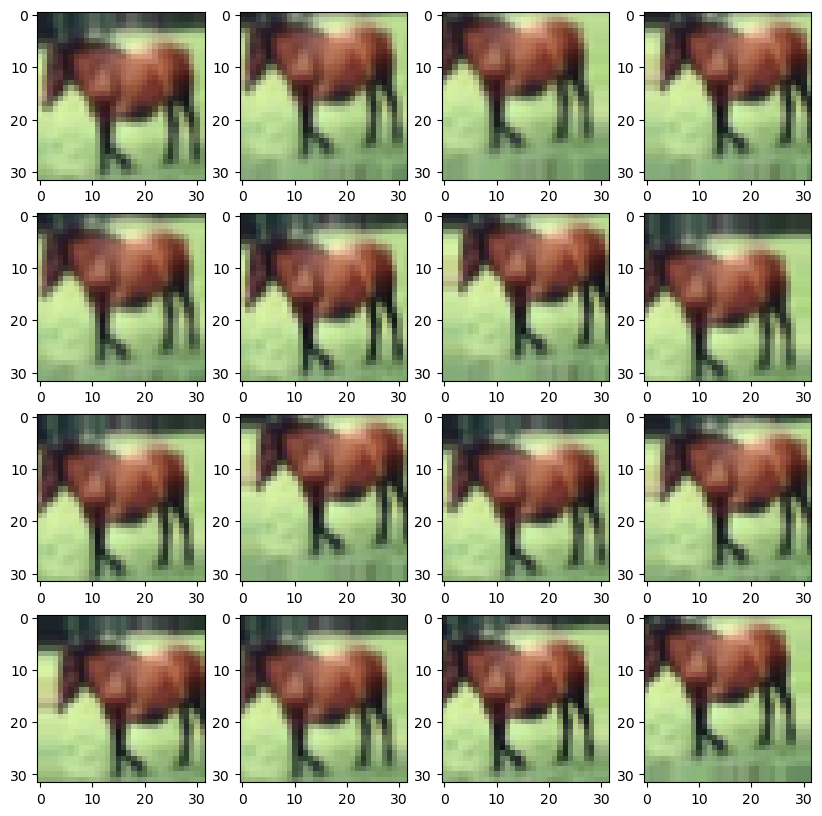

In [12]:
params = {
    'height_shift_range': 0.1,
    'width_shift_range': 0.1
}
plot_augmentation_image(train_sample, params)


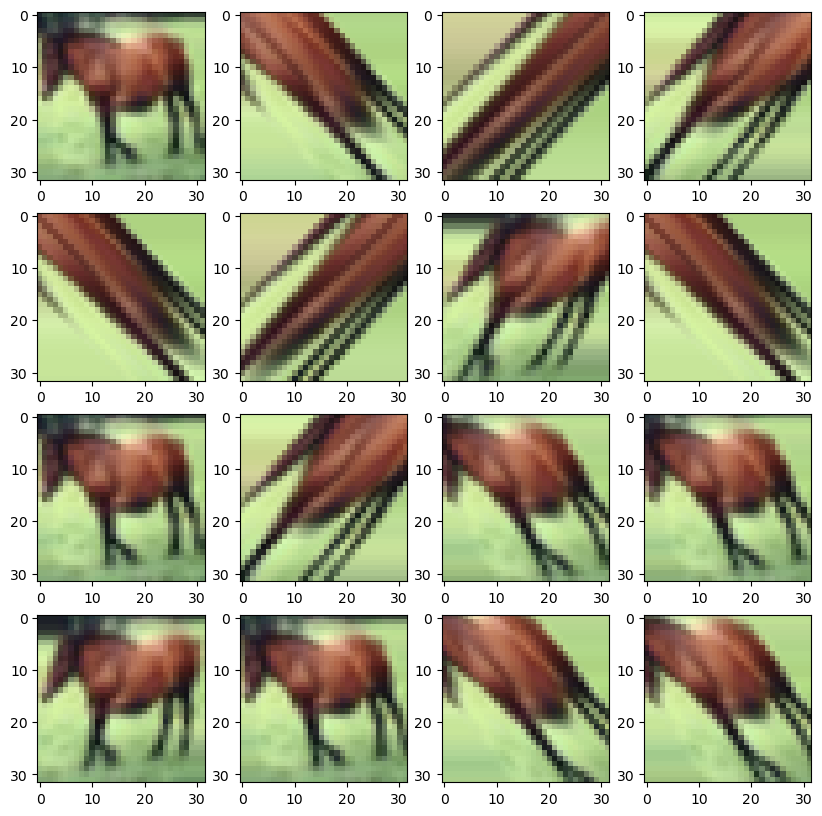

In [13]:
params = {
    'shear_range': 90
}
plot_augmentation_image(train_sample, params)


In [15]:
# params = {
#     'channel_shift_range': 127
# }
# plot_augmentation_image(train_sample, params)


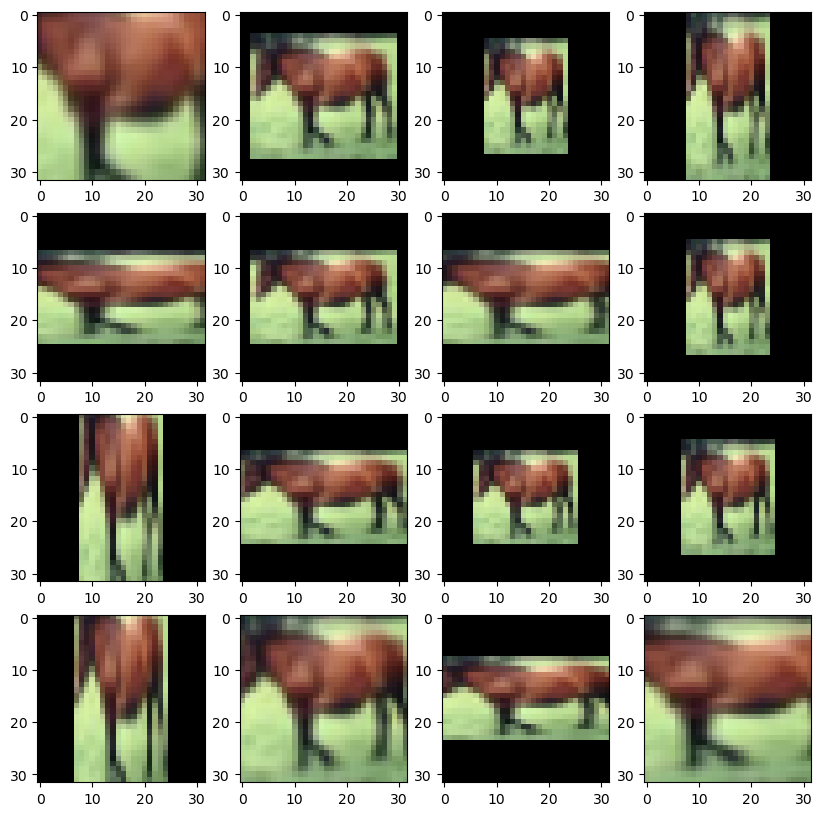

In [16]:
params = {
    'zoom_range': [0.5, 2.0],
    'fill_mode': 'constant',
    'cval': 0
}
plot_augmentation_image(train_sample, params)
